In [1]:
import pandas as pd
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\\Users\\Gobi\\OneDrive\\Documents\\daataset\\card_transdata.csv", skiprows=range(1, 100000), nrows=20000)
df.to_csv('reduced_data.csv', index=False)

In [2]:
df= pd.read_csv('reduced_data.csv')
df.shape

(20000, 8)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,9.310937,0.034799,0.489110,1.0,0.0,0.0,1.0,0.0
1,24.357036,1.431906,1.828736,1.0,1.0,0.0,1.0,0.0
2,19.749802,15.851796,1.210981,1.0,0.0,0.0,1.0,0.0
3,12.242612,0.332659,0.999442,1.0,0.0,0.0,1.0,0.0
4,11.662103,0.098985,0.447610,1.0,1.0,0.0,1.0,0.0


In [5]:
x = df.drop(['fraud'],axis='columns')
y= df['fraud']


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)


#model
model = svm.SVC(kernel='rbf')

#Training
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Confusion metrics\n',metrics.confusion_matrix(y_test,y_pred))
print('precision',metrics.precision_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print('RMSE',metrics.root_mean_squared_error(y_test,y_pred))

Accuracy: 0.91525
Confusion metrics
 [[3599   46]
 [ 293   62]]
precision 0.5740740740740741
F1 Score: 0.2678185745140389
Recall: 0.17464788732394365
RMSE 0.29111853256019277


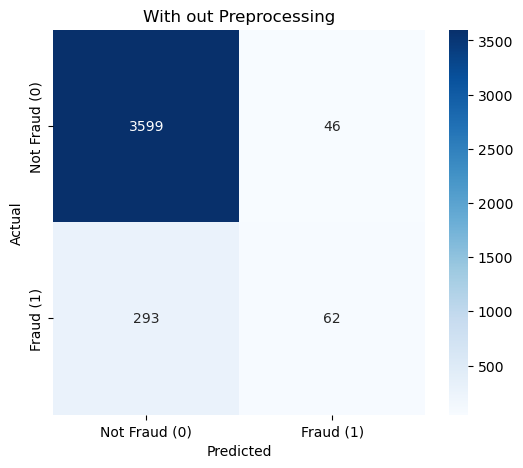

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Optional: define class labels
labels = ['Not Fraud (0)', 'Fraud (1)']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('With out Preprocessing')
plt.show()

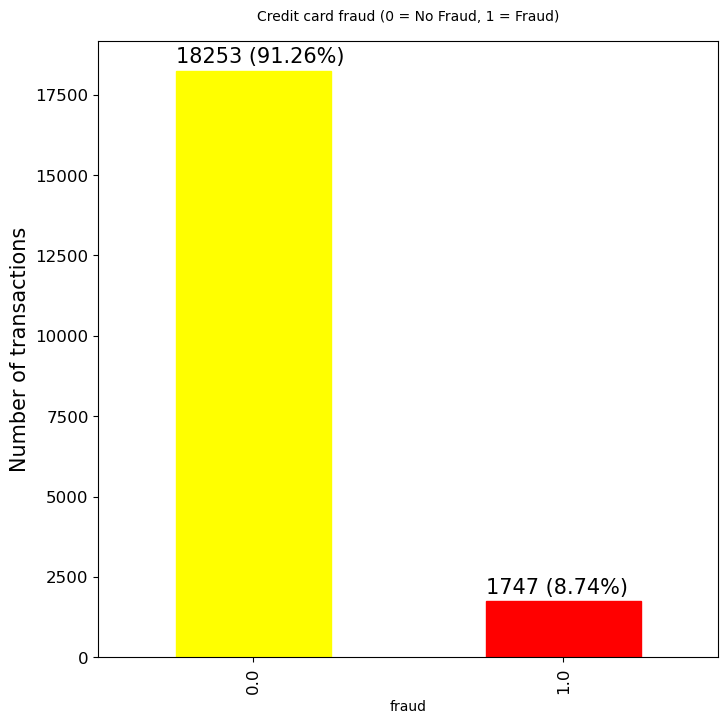

In [7]:
ax = df['fraud'].value_counts().plot(kind='bar', figsize=(8, 8), fontsize=12)
ax.set_title('Credit card fraud (0 = No Fraud, 1 = Fraud)', size=10, pad=15)
ax.set_ylabel('Number of transactions', fontsize=15)

N = len(df)
colors= ['yellow','red']
idx = 0
for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + 240, f"{str(round(i.get_height(), 2))} ({round(i.get_height()*100/N, 2)}%)", fontsize=15)
    i.set_color(colors[idx])
    idx+=1

 # Now data preprocessing and balancing the imbalance data

In [8]:
deletes = ['ratio_to_median_purchase_price','online_order']
data= df.drop(deletes,axis=1)

In [9]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
fraud                             0
dtype: int64

In [10]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

In [11]:
data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              20000 non-null  float64
 1   distance_from_last_transaction  20000 non-null  float64
 2   repeat_retailer                 20000 non-null  float64
 3   used_chip                       20000 non-null  float64
 4   used_pin_number                 20000 non-null  float64
 5   fraud                           20000 non-null  float64
dtypes: float64(6)
memory usage: 937.6 KB


In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [21]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [22]:
# Train model
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print('precision',metrics.precision_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print('RMSE',metrics.root_mean_squared_error(y_test,y_pred))

Accuracy: 0.97775
Confusion Matrix:
 [[3641    4]
 [  85  270]]
precision 0.9854014598540146
F1 Score: 0.8585055643879174
Recall: 0.7605633802816901
RMSE 0.14916433890176298


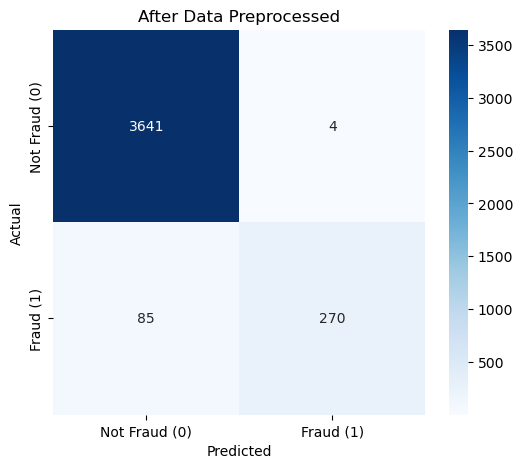

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Optional: define class labels
labels = ['Not Fraud (0)', 'Fraud (1)']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('After Data Preprocessed')
plt.show()

# SMOTE

In [19]:
from imblearn.over_sampling import SMOTE


X = df.drop(['fraud'],axis='columns')
y= df['fraud']

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (20000, 7)
Shape of X after SMOTE: (36506, 7)

Balance of positive and negative classes (%):


fraud
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

In [47]:
# 1. Feature Scaling (recommended for SVM)
scaler = StandardScaler()
X_sm_scaled = scaler.fit_transform(X_sm)

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_sm_scaled, y_sm, test_size=0.2, random_state=42)

# 3. Create and train the SVM model
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = svm_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Confusion metrics\n',metrics.confusion_matrix(y_test,y_pred))
print('precision',metrics.precision_score(y_test,y_pred))
print("\nF1 Score:", metrics.f1_score(y_test, y_pred))
print("\nRecall:", metrics.recall_score(y_test, y_pred))
print('RMSE',metrics.root_mean_squared_error(y_test,y_pred))


Accuracy: 0.9905505341002465
Confusion metrics
 [[3598   65]
 [   4 3635]]
precision 0.9824324324324324

F1 Score: 0.990598174138166

Recall: 0.9989007969222314
RMSE 0.09720836332205934


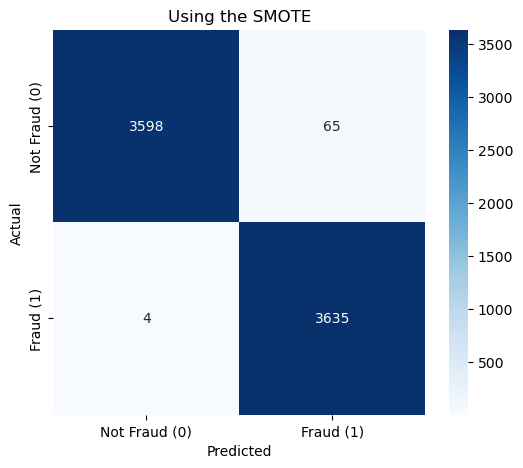

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Optional: define class labels
labels = ['Not Fraud (0)', 'Fraud (1)']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Using the SMOTE')
plt.show()

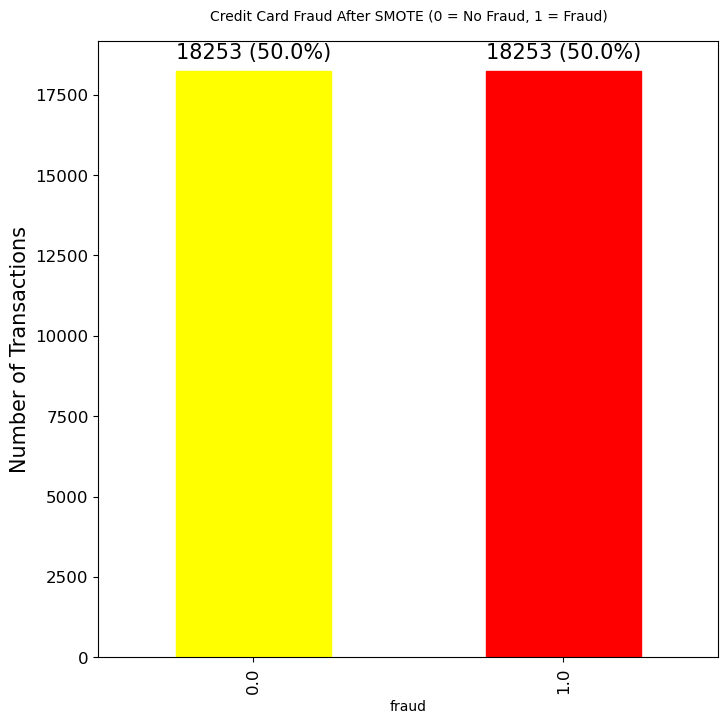

In [41]:
import matplotlib.pyplot as plt

# Plot the class distribution after SMOTE
ax = y_sm.value_counts().plot(kind='bar', figsize=(8, 8), fontsize=12)

ax.set_title('Credit Card Fraud After SMOTE (0 = No Fraud, 1 = Fraud)', size=10, pad=15)
ax.set_ylabel('Number of Transactions', fontsize=15)

N = len(y_sm)
colors = ['yellow', 'red']  # Assuming class 0 and 1
idx = 0

for i in ax.patches:
    count = i.get_height()
    percentage = round(count * 100 / N, 2)
    ax.text(i.get_x(), count + N * 0.01, f"{int(count)} ({percentage}%)", fontsize=15)
    i.set_color(colors[idx])
    idx += 1

plt.show()


# TOMO Link

In [22]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def topo_smote(X, y, minority_class=1, n_samples=100, k=5):
    X_min = X[y == minority_class].to_numpy()
    new_samples = []

    nn = NearestNeighbors(n_neighbors=k+1).fit(X_min)
    distances, indices = nn.kneighbors(X_min)

    for _ in range(n_samples):
        i = np.random.randint(0, len(X_min))
        neighbor_idx = np.random.choice(indices[i][1:])  # skip self

        # Topo-weighted interpolation
        alpha = np.random.rand()
        synthetic = X_min[i] + alpha * (X_min[neighbor_idx] - X_min[i])

        new_samples.append(synthetic)

    return np.vstack([X, new_samples]), np.concatenate([y, [minority_class]*n_samples])


In [23]:
X_new, y_new = topo_smote(X, y, minority_class=1, n_samples=100)


print(X_new.shape)
print(y_new.shape)

# Optional: Check number of minority samples before and after
print("Minority samples before:", sum(y == 1))
print("Minority samples after:", sum(y_new == 1))


(20100, 7)
(20100,)
Minority samples before: 1747
Minority samples after: 1847


In [48]:
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42)

# 3. Create and train the SVM model
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = svm_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Confusion metrics\n',metrics.confusion_matrix(y_test,y_pred))
print('precision',metrics.precision_score(y_test,y_pred))
print("\nF1 Score:", metrics.f1_score(y_test, y_pred))
print("\nRecall:", metrics.recall_score(y_test, y_pred))
print('RMSE',metrics.root_mean_squared_error(y_test,y_pred))


Accuracy: 0.9915422885572139
Confusion metrics
 [[3642    6]
 [  28  344]]
precision 0.9828571428571429

F1 Score: 0.9529085872576177

Recall: 0.9247311827956989
RMSE 0.09196581670809034


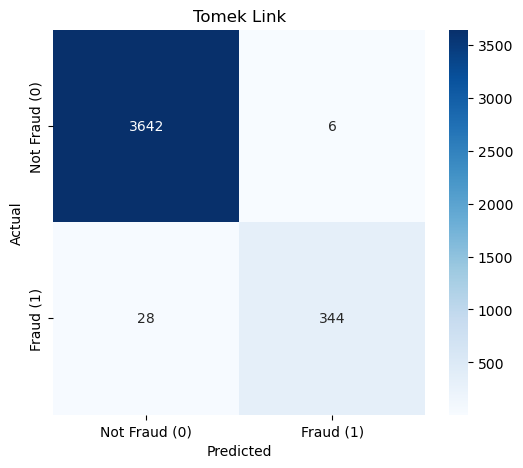

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Optional: define class labels
labels = ['Not Fraud (0)', 'Fraud (1)']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tomek Link')
plt.show()

# Levy Sparrow search algorithm


In [49]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, mean_squared_error
from imblearn.over_sampling import SMOTE

# ------------------------- 0. Fix the Random Seed for Stability -------------------------
random.seed(100)
np.random.seed(100)

# ------------------------- 1. Load and Prepare -------------------------
# Example: df = pd.read_csv("your_data.csv")
X = df.drop(['fraud'], axis='columns')
y = df['fraud']

# Save the feature names before converting to numpy
feature_names = X.columns

X = X.values
y = y.values

# ------------------------- 2. Split the Data into Training and Testing -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE on the training data only to avoid data leakage
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# ------------------------- 3. Levy Flight -------------------------
def levy_flight(Lambda):
    sigma = (np.math.gamma(1 + Lambda) * np.sin(np.pi * Lambda / 2) /
             (np.math.gamma((1 + Lambda) / 2) * Lambda * 2 ** ((Lambda - 1) / 2))) ** (1 / Lambda)
    u = np.random.normal(0, sigma)
    v = np.random.normal(0, 1)
    step = u / abs(v) ** (1 / Lambda)
    return step

# ------------------------- 4. LSSA for Feature Selection -------------------------
def lssa_feature_selection(X, y, num_agents=5, max_iter=10):
    num_features = X.shape[1]
    positions = np.random.randint(0, 2, size=(num_agents, num_features))
    fitness = np.zeros(num_agents)

    def evaluate(position):
        if np.sum(position) == 0:
            return 0
        selected_features = X[:, position == 1]
        clf = SVC(kernel='linear', max_iter=1000, random_state=42)
        clf.fit(selected_features, y)
        pred = clf.predict(selected_features)
        return accuracy_score(y, pred)

    # Evaluate initial population
    for i in range(num_agents):
        fitness[i] = evaluate(positions[i])

    best_idx = np.argmax(fitness)
    best_position = positions[best_idx].copy()
    best_score = fitness[best_idx]

    for iter in range(max_iter):
        for i in range(num_agents):
            step_size = np.array([levy_flight(1.5) for _ in range(num_features)])
            new_position = positions[i] + step_size
            new_position = np.where(new_position > 0.5, 1, 0)

            new_fitness = evaluate(new_position)
            if new_fitness > fitness[i]:
                positions[i] = new_position
                fitness[i] = new_fitness

            if new_fitness > best_score:
                best_score = new_fitness
                best_position = new_position.copy()

        print(f"Iteration {iter+1}/{max_iter}, Best Score: {best_score:.4f}")

    return best_position.astype(int)

# ------------------------- 5. Run LSSA -------------------------
best_mask = lssa_feature_selection(X_train, y_train, num_agents=5, max_iter=10)
print("\nSelected Features Mask:", best_mask)

selected_features = feature_names[best_mask == 1]
eliminated_features = feature_names[best_mask == 0]

print("\nSelected Features:")
print(list(selected_features))

print("\nEliminated Features:")
print(list(eliminated_features))

# ------------------------- 6. Train Final Model Using Selected Features -------------------------
X_selected_train = X_train[:, best_mask == 1]
X_selected_test = X_test[:, best_mask == 1]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_selected_train)
X_test_scaled = scaler.transform(X_selected_test)

# Train the SVM classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n Accuracy: {acc:.4f}")
print(f"\n Confusion Matrix:\n{conf_matrix}")
print(f"\n Precision: {precision:.4f}")
print("\nF1 Score:", metrics.f1_score(y_test, y_pred))
print("\nRecall:", metrics.recall_score(y_test, y_pred))
print(f"\n RMSE: {rmse:.4f}")


Iteration 1/10, Best Score: 0.7066
Iteration 2/10, Best Score: 0.7066
Iteration 3/10, Best Score: 0.7066
Iteration 4/10, Best Score: 0.7066
Iteration 5/10, Best Score: 0.7066
Iteration 6/10, Best Score: 0.8198
Iteration 7/10, Best Score: 0.8198
Iteration 8/10, Best Score: 0.8198
Iteration 9/10, Best Score: 0.8198
Iteration 10/10, Best Score: 0.8198

Selected Features Mask: [1 1 1 1 0 1 1]

Selected Features:
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_pin_number', 'online_order']

Eliminated Features:
['used_chip']

 Accuracy: 0.9380

 Confusion Matrix:
[[5117  353]
 [  19  511]]

 Precision: 0.5914

F1 Score: 0.733142037302726

Recall: 0.9641509433962264

 RMSE: 0.2490


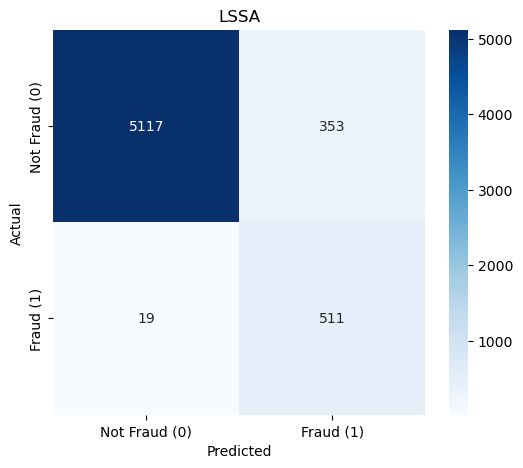

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Optional: define class labels
labels = ['Not Fraud (0)', 'Fraud (1)']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSSA')
plt.show()

In [50]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, mean_squared_error
from imblearn.over_sampling import SMOTE
import random


random.seed(42)
np.random.seed(42)

# ------------------------- 1. Load and Prepare -------------------------
# Replace with your actual dataset loading step if needed

X = df.drop(['fraud'], axis='columns')
y = df['fraud']

# Save the feature names before converting to numpy
feature_names = X.columns

# Apply SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

# Convert to numpy arrays
X_sm = X_sm.values
y_sm = y_sm.values

# ------------------------- 2. Split the Data into Training and Testing -------------------------
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

# ------------------------- 3. Levy Flight -------------------------
def levy_flight(Lambda):
    sigma = (np.math.gamma(1 + Lambda) * np.sin(np.pi * Lambda / 2) /
             (np.math.gamma((1 + Lambda) / 2) * Lambda * 2 ** ((Lambda - 1) / 2))) ** (1 / Lambda)
    u = np.random.normal(0, sigma)
    v = np.random.normal(0, 1)
    step = u / abs(v) ** (1 / Lambda)
    return step

# ------------------------- 4. LSSA for Feature Selection -------------------------
def lssa_feature_selection(X, y, num_agents=5, max_iter=10):
    num_features = X.shape[1]
    positions = np.random.randint(0, 2, size=(num_agents, num_features))
    fitness = np.zeros(num_agents)

    def evaluate(position):
        if np.sum(position) == 0:
            return 0
        selected_features = X[:, position == 1]
        clf = SVC(kernel='linear', max_iter=1000)
        clf.fit(selected_features, y)
        pred = clf.predict(selected_features)
        return accuracy_score(y, pred)

    # Evaluate initial population
    for i in range(num_agents):
        fitness[i] = evaluate(positions[i])

    best_idx = np.argmax(fitness)
    best_position = positions[best_idx].copy()
    best_score = fitness[best_idx]

    # Iterate for feature selection optimization
    for iter in range(max_iter):
        for i in range(num_agents):
            step_size = np.array([levy_flight(1.5) for _ in range(num_features)])
            new_position = positions[i] + step_size
            new_position = np.where(new_position > 0.5, 1, 0)

            new_fitness = evaluate(new_position)
            if new_fitness > fitness[i]:
                positions[i] = new_position
                fitness[i] = new_fitness

            if new_fitness > best_score:
                best_score = new_fitness
                best_position = new_position.copy()

        print(f"Iteration {iter+1}/{max_iter}, Best Score: {best_score:.4f}")

    return best_position.astype(int)

# ------------------------- 5. Run LSSA -------------------------
best_mask = lssa_feature_selection(X_train, y_train, num_agents=5, max_iter=10)
print("\nSelected Features Mask:", best_mask)

# Display selected and eliminated features
selected_features = feature_names[best_mask == 1]
eliminated_features = feature_names[best_mask == 0]

print("\n Selected Features:")
print(list(selected_features))

print("\n Eliminated Features:")
print(list(eliminated_features))

# ------------------------- 6. Train Final Model Using Selected Features -------------------------
X_selected_train = X_train[:, best_mask == 1]
X_selected_test = X_test[:, best_mask == 1]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_selected_train)
X_test_scaled = scaler.transform(X_selected_test)

# Train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n Accuracy: {acc:.4f}")
print(f"\n Confusion Matrix:\n{conf_matrix}")
print(f"\n Precision: {precision:.4f}")
print("\nF1 Score:", metrics.f1_score(y_test, y_pred))
print("\nRecall:", metrics.recall_score(y_test, y_pred))
print(f"\n RMSE: {rmse:.4f}")


Iteration 1/10, Best Score: 0.6079
Iteration 2/10, Best Score: 0.6079
Iteration 3/10, Best Score: 0.6746
Iteration 4/10, Best Score: 0.6746
Iteration 5/10, Best Score: 0.6746
Iteration 6/10, Best Score: 0.6746
Iteration 7/10, Best Score: 0.6746
Iteration 8/10, Best Score: 0.6746
Iteration 9/10, Best Score: 0.7766
Iteration 10/10, Best Score: 0.7766

Selected Features Mask: [1 1 1 1 0 0 0]

 Selected Features:
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer']

 Eliminated Features:
['used_chip', 'used_pin_number', 'online_order']

 Accuracy: 0.9160

 Confusion Matrix:
[[4823  660]
 [ 260 5209]]

 Precision: 0.8875

F1 Score: 0.9188569412594814

Recall: 0.9524593161455477

 RMSE: 0.2898


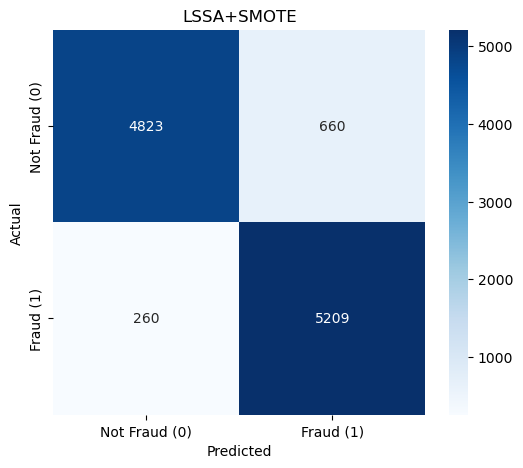

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Optional: define class labels
labels = ['Not Fraud (0)', 'Fraud (1)']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSSA+SMOTE')
plt.show()

## Graph using KNN - Smote


In [32]:
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn import svm, metrics
import numpy as np
import pandas as pd  # Required for pd.concat and pd.Series

import warnings
warnings.filterwarnings('ignore')

x = df.drop(['fraud'],axis='columns')
y= df['fraud']

# Parameters
k_neighbors = 5  # for k-NN graph
safe_threshold = 0.7  # % of minority neighbors to consider a sample "safe"

def graph_smote(X_train, y_train, k_neighbors=5, safe_threshold=0.7, apply_tomek=True):
    X_train = np.array(X_train)         # Ensure it's a NumPy array
    y_train = np.array(y_train)

    # Separate classes
    X_minority = X_train[y_train == 1]
    X_majority = X_train[y_train == 0]

    # Build k-NN graph on all training data
    nn = NearestNeighbors(n_neighbors=k_neighbors + 1)  # +1 because it includes the point itself
    nn.fit(X_train)
    neighbors = nn.kneighbors(X_minority, return_distance=False)

    # Determine "safe" samples (mostly surrounded by minority neighbors)
    safe_indices = []
    for i, neighbor_indices in enumerate(neighbors):
        neighbor_classes = y_train[neighbor_indices[1:]]  # skip self
        minority_ratio = sum(neighbor_classes == 1) / k_neighbors
        if minority_ratio >= safe_threshold:
            safe_indices.append(i)

    # Filter only safe minority samples
    X_safe = X_minority[safe_indices]
    y_safe = np.ones(X_safe.shape[0], dtype=int)

    print(f"Original class distribution: {Counter(y_train)}")
    print(f"Safe minority samples selected for SMOTE: {len(X_safe)}")

    # Apply SMOTE only on safe samples + all data for majority
    X_smote_input = np.vstack([X_majority, X_safe])
    y_smote_input = np.array([0] * len(X_majority) + [1] * len(X_safe))

    smote = SMOTE(sampling_strategy='auto', k_neighbors=min(k_neighbors, len(X_safe) - 1))
    X_resampled, y_resampled = smote.fit_resample(X_smote_input, y_smote_input)

    if apply_tomek:
        # Optional: Clean with Tomek Links
        tl = TomekLinks()
        X_resampled, y_resampled = tl.fit_resample(X_resampled, y_resampled)

    print(f"Resampled class distribution: {Counter(y_resampled)}")
    return X_resampled, y_resampled

# 💡 Apply Graph-SMOTE
X_balanced, y_balanced = graph_smote(X_train, y_train)

# 👨‍🏫 Train your model with balanced data
model = svm.SVC(kernel='rbf')
model.fit(X_balanced, y_balanced)

# 🧪 Evaluate on original test set
y_pred = model.predict(X_test)

print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nPrecision:", metrics.precision_score(y_test, y_pred))
print("\nRecall:", metrics.recall_score(y_test, y_pred))
print("\nF1 Score:", metrics.f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nRMSE :",metrics.root_mean_squared_error(y_test, y_pred))


Original class distribution: Counter({1.0: 12784, 0.0: 12770})
Safe minority samples selected for SMOTE: 12650
Resampled class distribution: Counter({0: 12770, 1: 12745})

Accuracy: 0.9447589481373265

Precision: 0.9014526246285903

Recall: 0.9985372097275553

F1 Score: 0.9475145311008936

Confusion Matrix:
 [[4886  597]
 [   8 5461]]

RMSE : 0.23503415041792008


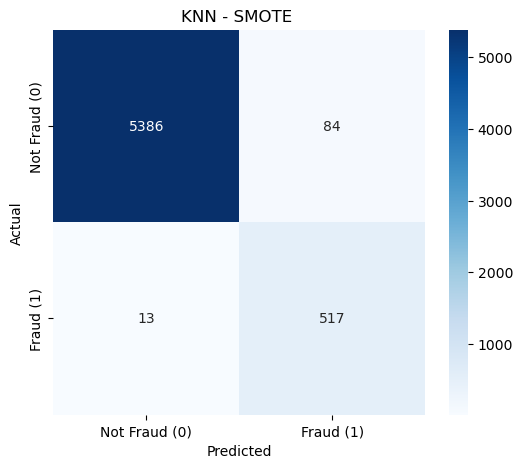

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Optional: define class labels
labels = ['Not Fraud (0)', 'Fraud (1)']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN - SMOTE ')
plt.show()

Text(0, 0.5, 'Accuracy')

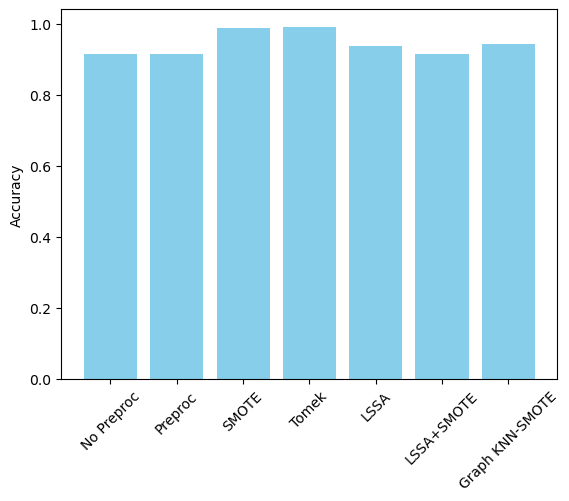

In [32]:
import matplotlib.pyplot as plt
methods = ['No Preproc', 'Preproc', 'SMOTE', 'Tomek', 'LSSA', 'LSSA+SMOTE', 'Graph KNN-SMOTE']
accuracy = [0.915, 0.915, 0.990, 0.992, 0.938, 0.916, 0.944]
plt.bar(methods, accuracy, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

In [38]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Fix the Random Seed for Stability
random.seed(42)
np.random.seed(42)

# Load and Prepare Data
# Example: df = pd.read_csv("your_data.csv")
X = df.drop(['fraud'], axis='columns')
y = df['fraud']

# Save the feature names before converting to numpy
feature_names = X.columns

X = X.values
y = y.values

# Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------- 1. Levy Sparrow Search Algorithm for Feature Selection -------------------------
def levy_flight(Lambda):
    sigma = (np.math.gamma(1 + Lambda) * np.sin(np.pi * Lambda / 2) /
             (np.math.gamma((1 + Lambda) / 2) * Lambda * 2 ** ((Lambda - 1) / 2))) ** (1 / Lambda)
    u = np.random.normal(0, sigma)
    v = np.random.normal(0, 1)
    step = u / abs(v) ** (1 / Lambda)
    return step

def lssa_feature_selection(X, y, num_agents=5, max_iter=10):
    num_features = X.shape[1]
    positions = np.random.randint(0, 2, size=(num_agents, num_features))
    fitness = np.zeros(num_agents)

    def evaluate(position):
        if np.sum(position) == 0:
            return 0
        selected_features = X[:, position == 1]
        clf = SVC(kernel='linear', max_iter=1000, random_state=42)
        clf.fit(selected_features, y)
        pred = clf.predict(selected_features)
        return accuracy_score(y, pred)

    # Evaluate initial population
    for i in range(num_agents):
        fitness[i] = evaluate(positions[i])

    best_idx = np.argmax(fitness)
    best_position = positions[best_idx].copy()
    best_score = fitness[best_idx]

    for iter in range(max_iter):
        for i in range(num_agents):
            step_size = np.array([levy_flight(1.5) for _ in range(num_features)])
            new_position = positions[i] + step_size
            new_position = np.where(new_position > 0.5, 1, 0)

            new_fitness = evaluate(new_position)
            if new_fitness > fitness[i]:
                positions[i] = new_position
                fitness[i] = new_fitness

            if new_fitness > best_score:
                best_score = new_fitness
                best_position = new_position.copy()

        print(f"Iteration {iter+1}/{max_iter}, Best Score: {best_score:.4f}")

    return best_position.astype(int)

# Run LSSA
best_mask = lssa_feature_selection(X_train, y_train, num_agents=5, max_iter=10)
print("\nSelected Features Mask:", best_mask)

selected_features = feature_names[best_mask == 1]
eliminated_features = feature_names[best_mask == 0]

print("\nSelected Features:")
print(list(selected_features))

print("\nEliminated Features:")
print(list(eliminated_features))

# ------------------------- 2. Apply KNN-based SMOTE on Selected Features -------------------------
X_selected_train = X_train[:, best_mask == 1]
X_selected_test = X_test[:, best_mask == 1]

def graph_smote(X_train, y_train, k_neighbors=5, safe_threshold=0.7):
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Separate classes
    X_minority = X_train[y_train == 1]
    X_majority = X_train[y_train == 0]
# Build k-NN graph on all training data
    nn = NearestNeighbors(n_neighbors=k_neighbors + 1)
    nn.fit(X_train)
    neighbors = nn.kneighbors(X_minority, return_distance=False)

    # Determine "safe" samples
    safe_indices = []
    for i, neighbor_indices in enumerate(neighbors):
        neighbor_classes = y_train[neighbor_indices[1:]]  # skip self
        minority_ratio = sum(neighbor_classes == 1) / k_neighbors
        if minority_ratio >= safe_threshold:
            safe_indices.append(i)

    # Filter only safe minority samples
    X_safe = X_minority[safe_indices]
    y_safe = np.ones(X_safe.shape[0], dtype=int)

    # Apply SMOTE only on safe samples + all data for majority
    X_smote_input = np.vstack([X_majority, X_safe])
    y_smote_input = np.array([0] * len(X_majority) + [1] * len(X_safe))

    smote = SMOTE(sampling_strategy='auto', k_neighbors=min(k_neighbors, len(X_safe) - 1))
    X_resampled, y_resampled = smote.fit_resample(X_smote_input, y_smote_input)

    return X_resampled, y_resampled

# Apply Graph-SMOTE on the selected features
X_balanced, y_balanced = graph_smote(X_selected_train, y_train)

# ------------------------- 3. Train Final Model Using Balanced Data -------------------------
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_balanced)
X_test_scaled = scaler.transform(X_selected_test)

# Train the SVM classifier
clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train_scaled, y_balanced)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n Accuracy: {acc:.4f}")
print(f"\n Confusion Matrix:\n{conf_matrix}")
print(f"\n Precision: {precision:.4f}")
print(f"\n RMSE: {rmse:.4f}")

Iteration 1/10, Best Score: 0.9421
Iteration 2/10, Best Score: 0.9421
Iteration 3/10, Best Score: 0.9421
Iteration 4/10, Best Score: 0.9421
Iteration 5/10, Best Score: 0.9421
Iteration 6/10, Best Score: 0.9421
Iteration 7/10, Best Score: 0.9421
Iteration 8/10, Best Score: 0.9421
Iteration 9/10, Best Score: 0.9421
Iteration 10/10, Best Score: 0.9421

Selected Features Mask: [0 1 1 1 1 1 1]

Selected Features:
['distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

Eliminated Features:
['distance_from_home']

 Accuracy: 0.9708

 Confusion Matrix:
[[5423   47]
 [ 128  402]]

 Precision: 0.8953

 RMSE: 0.1708
